In [3]:
import matplotlib.pyplot as plt
import math
import numpy as np
import random

In [4]:
def graficar(r,x):
    fig, ax = plt.subplots();
    ax.scatter(r,x,s=0.001);

In [5]:
def normalizar(x):
    xn = [];
    xi = min(x);
    xf = max(x);
    print(xi,xf);
    m = 1000/(xf-xi);
    b = -m*xi;
    for i in range(len(x)):
        xn.append(int(m*x[i]+b));
    return xn

In [6]:
def mezclar_lista(lista_original):
    # Crear una copia, ya que no deberíamos modificar la original
    # https://parzibyte.me/blog/2020/05/31/python-clonar-lista-eliminar-referencia/
    lista = lista_original[:]
    # Ciclo for desde 0 hasta la longitud de la lista -1
    longitud_lista = len(lista)
    for i in range(longitud_lista):
        # Obtener un índice aleatorio
        # https://parzibyte.me/blog/2019/04/04/generar-numero-aleatorio-rango-python/
        indice_aleatorio = random.randint(0, longitud_lista - 1)
        # Intercambiar
        temporal = lista[i]
        lista[i] = lista[indice_aleatorio]
        lista[indice_aleatorio] = temporal
    # Regresarla
    return lista

In [7]:
# Feingenbaum, funcion logistica de bifurcacion
def Feigenbaum_bifurcacion(n,dr,fase,r0):
    x0 = 0.8;
    r = [r0];
    x = [x0];
    xf = [x0];
    for i in range(n):
        x.append(0);
        xf.append(0);
        r.append(r[i]+dr);
        x[i+1] = r[i]*x[i]*(1-x[i]);
        xf[i+1] = x[i-fase];
    return r,x,xf;

In [8]:
# Feingenbaum, funcion logistica exponencial
def Feigenbaum_exponencial(n,dr,fase,r0):
    x0 = 0.8;
    r = [r0];
    x = [x0];
    xf = [x0];
    for i in range(n):
        x.append(0);
        xf.append(0);
        r.append(r[i]+dr);
        x[i+1] = x[i]*math.exp(r[i]*(1-x[i]));
        xf[i+1] = x[i-fase];
    return r,x,xf;

In [9]:
# Feingenbaum, funcion logistica cubica
def Feigenbaum_cubica(n,dr,fase,r0):
    x0 = 0.8;
    r = [r0];
    x = [x0];
    xf = [x0];
    for i in range(n):
        x.append(0);
        xf.append(0);
        r.append(r[i]+dr);
        x[i+1] = x[i]+r[i]*x[i]*(x[i]*x[i]-1);
        xf[i+1] = x[i-fase];
    return r,x,xf;

In [10]:
# Feingenbaum, funcion logistica trianglar
def Feigenbaum_triangular(n,dr,fase,r0):
    x0 = 0.8;
    r = [r0];
    x = [x0];
    xf = [x0];
    for i in range(n):
        x.append(0);
        xf.append(0);
        r.append(r[i]+dr);
        if x[i]<0.5:
            x[i+1] = r[i]*x[i];
        else:
            x[i+1] = r[i]*(1-x[i]);
        xf[i+1] = x[i-fase];
    return r,x,xf;

In [11]:
# Henon
def Henon(n,dr,fase,r0):
    x0 = 0.8;
    y0 = 0.8;
    a = 1.1;
    b = 0.4;
    r = [r0];
    x = [x0];
    y = [y0];
    xf = [x0];
    yf = [y0];
    for i in range(n):
        x.append(0);
        y.append(0);
        xf.append(0);
        yf.append(0);
        r.append(r[i]+dr);
        x[i+1] = 1-a*x[i]*x[i]+y[i];
        y[i+1] = b*x[i];
        xf[i+1] = x[i-fase];
        yf[i+1] = y[i-fase];
    return r,x,y,xf,yf;

In [44]:
# Rossler
def Rossler(n,dr):
    r0 = 0;
    x0 = 0;
    y0 = 3.3;
    z0 = 0;
    alpha = 0.1;
    beta = 0.1;
    gamma = 8;
    r = [r0];
    xp = [x0];
    yp = [y0];
    zp = [z0];
    xc = [x0];
    yc = [y0];
    zc = [z0];
    for i in range(n):
        xp.append(0);
        yp.append(0);
        zp.append(0);
        xc.append(0);
        yc.append(0);
        zc.append(0);
        r.append(r[i]+dr);
        xp[i+1] = xp[i]+dr*(-yp[i]-zp[i]);
        yp[i+1] = yp[i]+dr*(xp[i]-alpha*yp[i]);
        zp[i+1] = zp[i]+dr*(beta+zp[i]*(xp[i]-gamma));
        xc[i+1] = xp[i]+dr/2*(-yp[i]-zp[i]-yp[i+1]-zp[i+1]);
        yc[i+1] = yp[i]+dr/2*(xp[i]-alpha*yp[i]+xp[i+1]-alpha*yp[i+1]);
        zc[i+1] = zp[i]+dr/2*(beta+zp[i]*(xp[i]-gamma)+beta+zp[i+1]*(xp[i+1]-gamma));
    return r,xc,yc,zc;

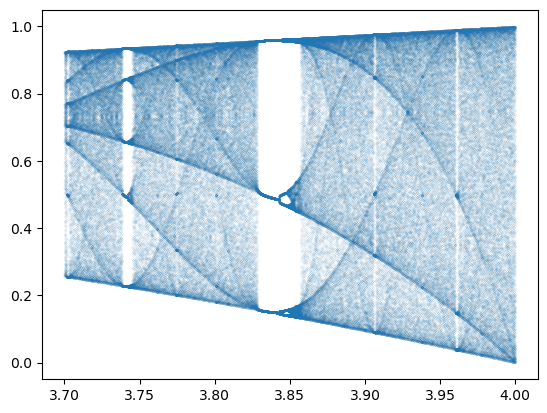

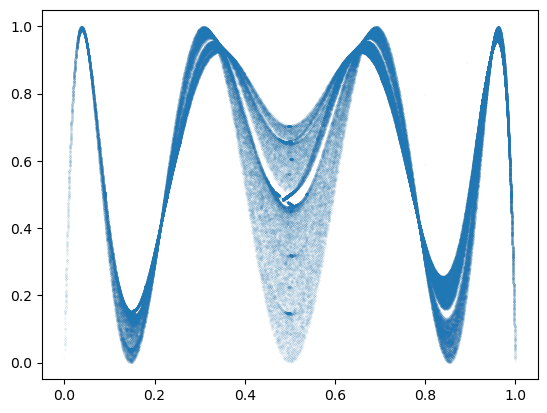

In [30]:
#r_1,x_1,xf_1 = Feigenbaum_bifurcacion(150000,0.00001,2,2.4);
r_1,x_1,xf_1 = Feigenbaum_bifurcacion(300000,0.000001,2,3.7);
graficar(r_1,x_1);
graficar(xf_1,x_1);

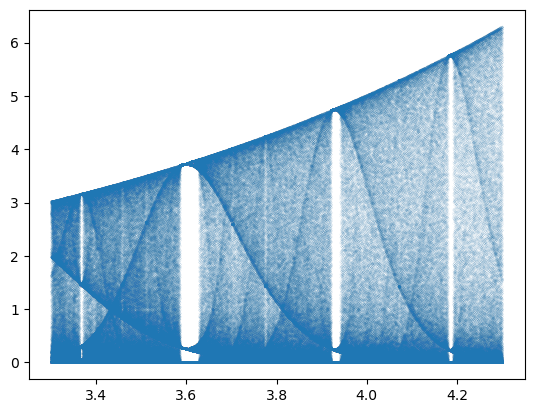

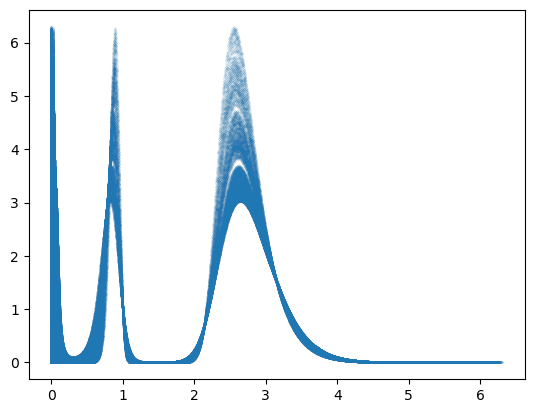

In [31]:
#r_2,x_2,xf_2 = Feigenbaum_exponencial(150000,0.00001,1,2.4);
r_2,x_2,xf_2 = Feigenbaum_exponencial(1000000,0.000001,2,3.3);
graficar(r_2,x_2);
graficar(xf_2,x_2);

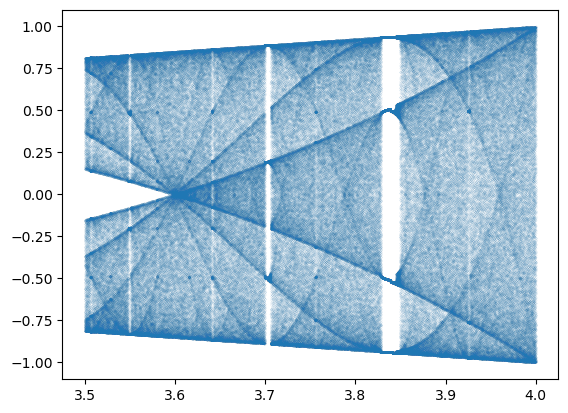

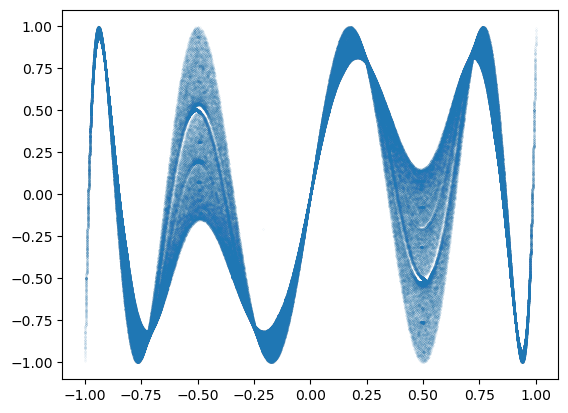

In [32]:
#r_3,x_3,xf_3 = Feigenbaum_cubica(120000,0.00001,1,2.8);
r_3,x_3,xf_3 = Feigenbaum_cubica(500000,0.000001,1,3.5);
graficar(r_3,x_3);
graficar(xf_3,x_3);

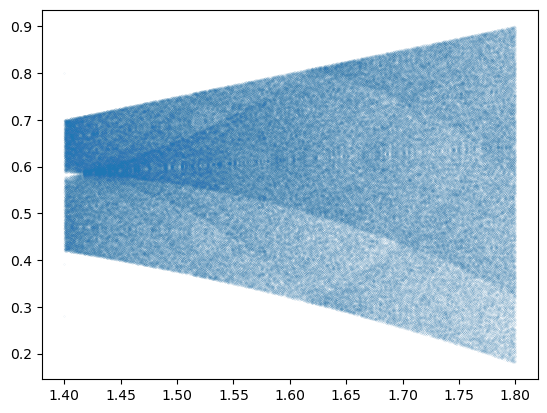

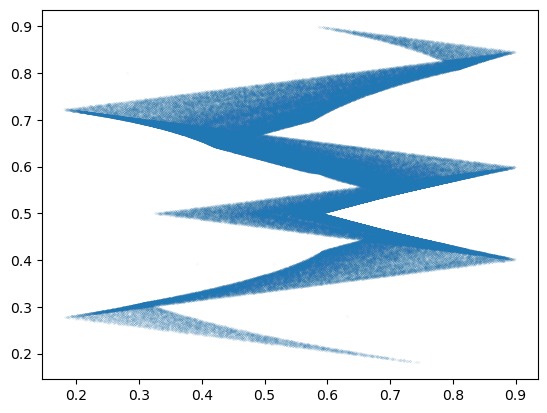

In [33]:
#r_4,x_4,xf_4 = Feigenbaum_triangular(80000,0.00001,2,1);
r_4,x_4,xf_4 = Feigenbaum_triangular(400000,0.000001,2,1.4);
graficar(r_4,x_4);
graficar(x_4,xf_4);

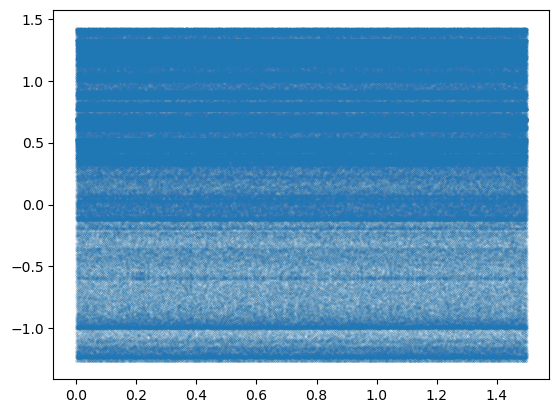

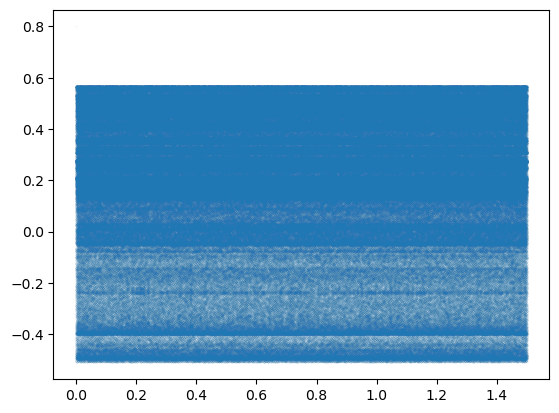

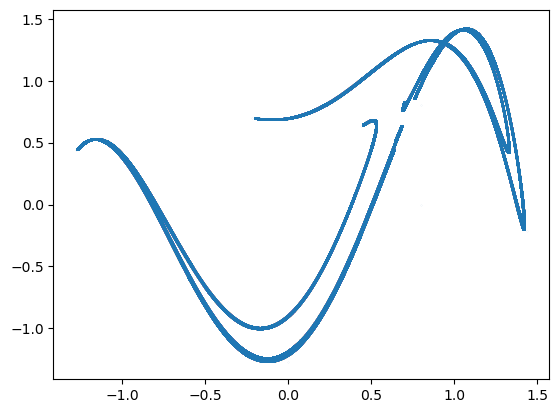

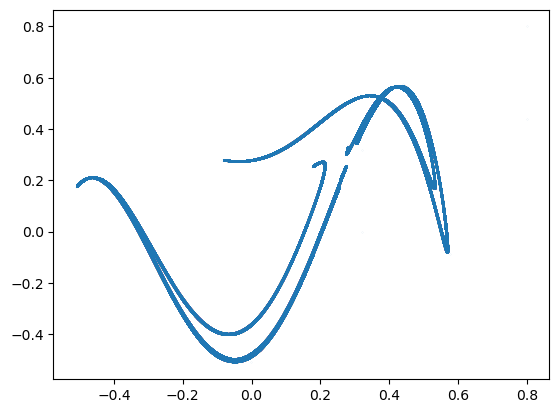

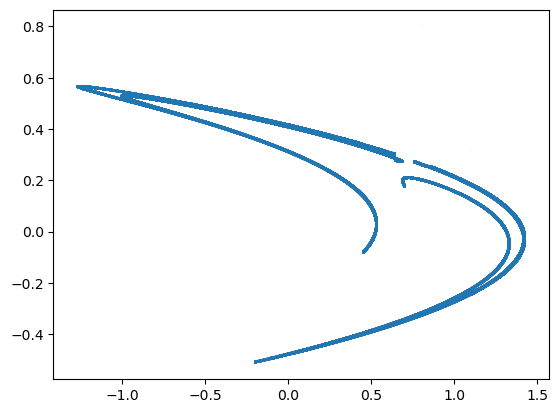

In [34]:
r_5,x_5,y_5,xf_5,yf_5 = Henon(1500000,0.000001,1,0);
graficar(r_5,x_5);
graficar(r_5,y_5);
graficar(xf_5,x_5);
graficar(yf_5,y_5);
graficar(x_5,y_5);

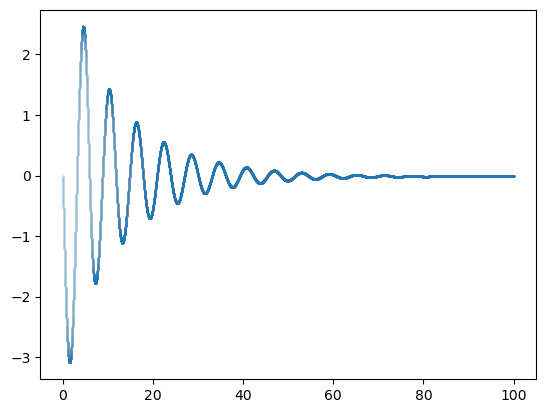

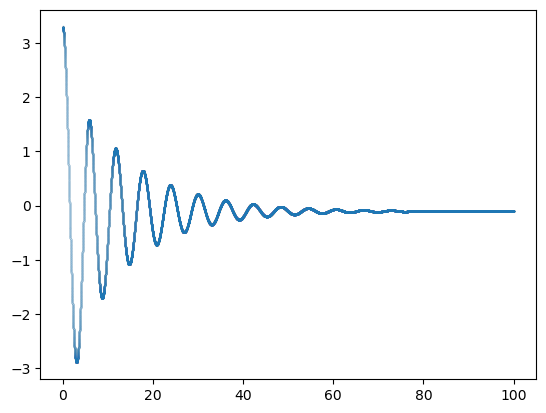

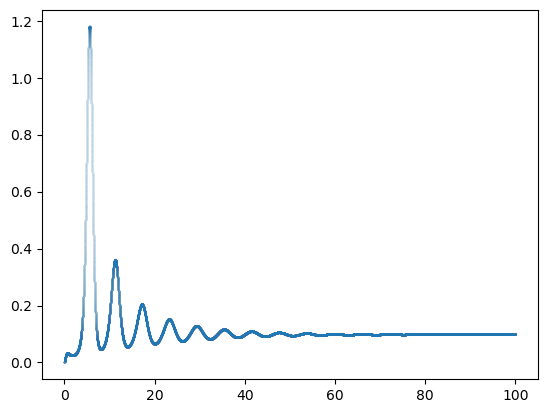

In [16]:
r,x,y,z = Rossler(1000000,0.0001);
graficar(r,x);
graficar(r,y);
graficar(r,z);

In [36]:
def mover(direccion,distancia,x,y,p,ancho,alto):
    #pr = [0,125,250,375,500,625,750,875,1000]
    pr = [100,200,250,450,500,700,750,950,1000]
    pd = [0,250,500,750,1000]
    #pd = [0,100,200,400,1000]
    signox = 0; signoy = 0; reb = 0; p = p; d = 0
    # Distancia a recorrer (1,2,3,4 pixeles)
    if int(pd[0]) <= int(distancia) < int(pd[1]): d = 3
    if int(pd[1]) <= int(distancia) < int(pd[2]): d = 4
    if int(pd[2]) <= int(distancia) < int(pd[3]): d = 5
    if int(pd[3]) <= int(distancia) <= int(pd[4]): d = 6
    #else: d = 0
    # UF
    if direccion >= pr[0] and direccion < pr[1]:
        for i in range(d):
            if x > ancho/2:
                signox = 1
                reb = reb + 1
            if y > alto/2:
                signoy = 1
                reb = reb + 1
            x = x+((-1)**signox)*p*d
            y = y+((-1)**signoy)*p*d  
    # FD
    if direccion >= pr[1] and direccion < pr[2]:
        for i in range(d):
            if x > ancho/2:
                signox = 1
                reb = reb + 1
            if y < -alto/2:
                signoy = 1
                reb = reb + 1
            x = x+((-1)**signox)*p*d
            y = y-((-1)**signoy)*p*d
    # U
    if direccion >= pr[2] and direccion < pr[3]:
        for i in range(d):
            if y > alto/2:
                signoy = 1
                reb = reb + 1
            y = y+((-1)**signoy)*p*d
    # F
    if direccion >= pr[3] and direccion < pr[4]:
        for i in range(d):
            if x > ancho/2:
                signox = 1
                reb = reb + 1
            x = x+((-1)**signox)*p*d
    # B
    if direccion >= pr[4] and direccion < pr[5]:
        for i in range(d):
            if x < -ancho/2:
                signox = 1
                reb = reb + 1
            x = x-((-1)**signox)*p*d
    # D
    if direccion >= pr[5] and direccion < pr[6]:
        for i in range(d):
            if y < -alto/2:
                signoy = 1
                reb = reb + 1
            y = y-((-1)**signoy)*p*d
    # DB
    if direccion >= pr[6] and direccion < pr[7]:
        for i in range(d):
            if x < -ancho/2:
                signox = 1
                reb = reb + 1
            if y < -alto/2:
                signoy = 1
                reb = reb + 1
            x = x-((-1)**signox)*p*d
            y = y-((-1)**signoy)*p*d
    # UB
    if direccion >= pr[7] and direccion < pr[8]:
        for i in range(d):
            if x < -ancho/2:
                signox = 1
                reb = reb + 1
            if y > alto/2:
                signoy = 1
                reb = reb + 1
            x = x-((-1)**signox)*p*d
            y = y+((-1)**signoy)*p*d
            
    return x,y,reb,p*d

In [37]:
def dibujar(rebotes,ancho,alto,p,k,serie,inicio):
    #setup(ancho, alto, 0, 0)
    #screensize(3000, 3000)
    # Condiciones iniciales
    x0 = int(serie[0+inicio])
    y0 = int(serie[1+inicio])
    xp = [x0]
    yp = [y0]
    area_cubierta = set([(x0, y0)])  # Añade posición inicial
    areas_por_paso = [1]
    dist_rec = 0
    #penup()
    #goto(x0, y0)
    #pendown()
    for i in range(1,k):
        dire = serie[2*i+inicio]
        dist = serie[2*i+1+inicio]
        x,y,re,d = mover(dire,dist,x0,y0,p,ancho,alto)
        dist_rec = dist_rec + d
        rebotes = rebotes + re
        #pensize(3*p)
        #pencolor(0.1, 0.5, 1)
        #goto(x, y)
        x0 = x
        y0 = y
        xp.append(x)
        yp.append(y)
        area_cubierta.add((x, y))  # Registra nueva posición
        areas_por_paso.append(len(area_cubierta))  # Actualiza el área cubierta
    fig, ax = plt.subplots(figsize=(10, 11))
    plt.title('Movimiento Browniano.')
    #plt.grid(True)
    ax.plot(xp, yp)
    fig, ax2 = plt.subplots(figsize=(10, 11))
    plt.title('Evolucion del area ocupada.')
    plt.grid(True)
    ax2.plot(areas_por_paso)
    #exitonclick()
    return rebotes,dist_rec

-0.5105691312076893 0.8
509487 3017436


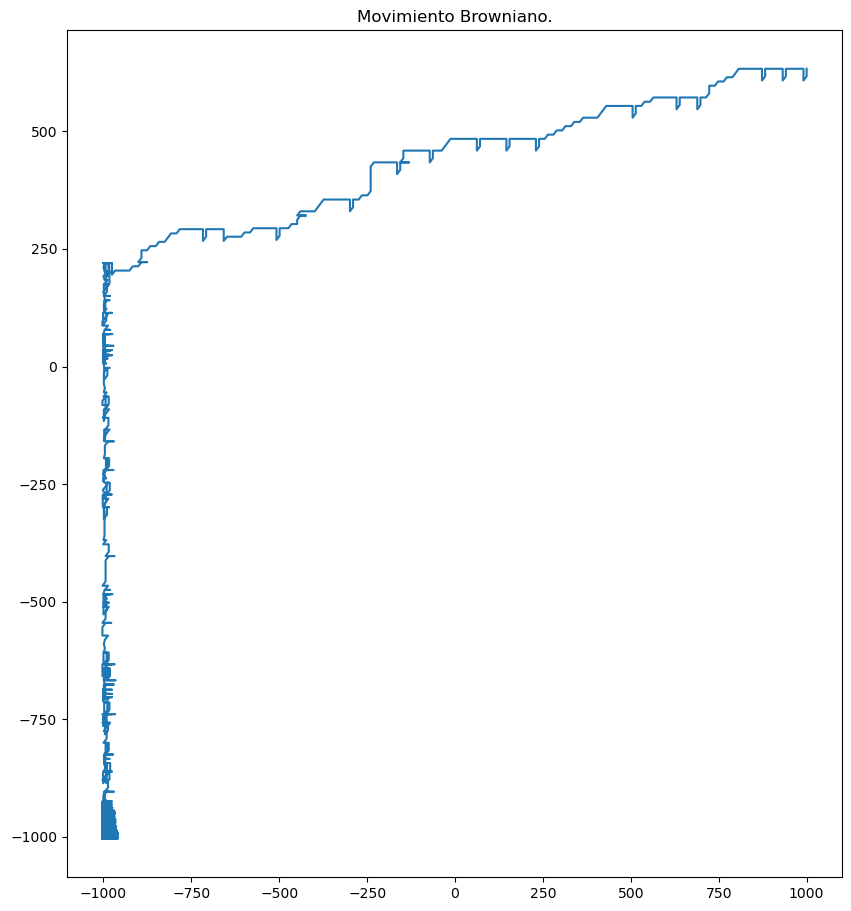

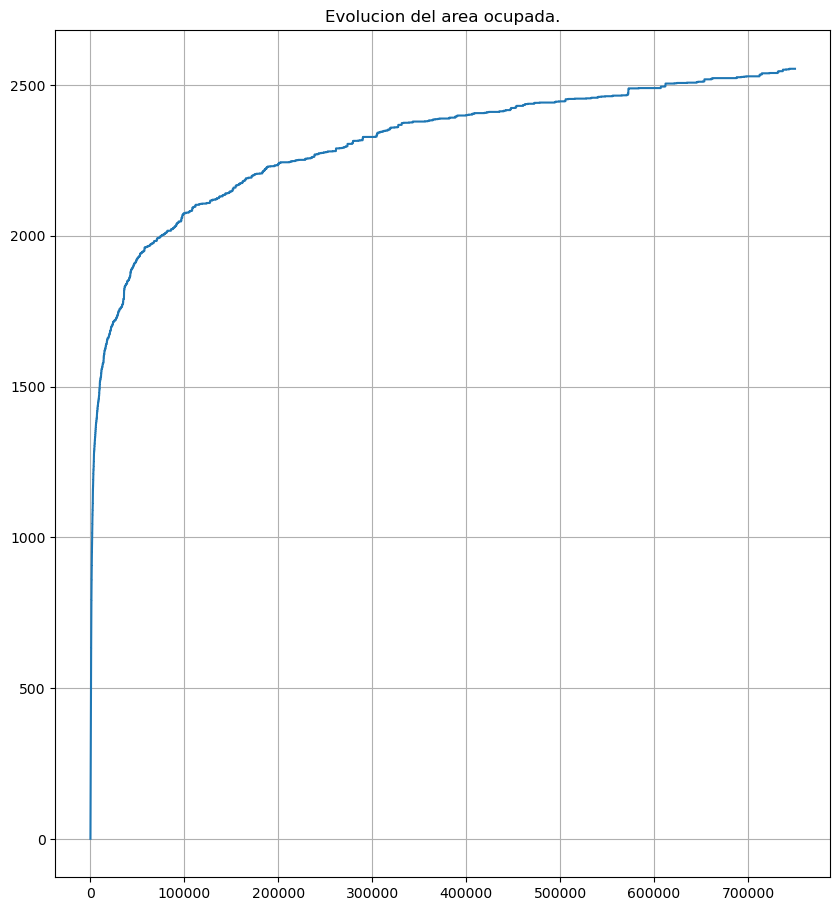

In [48]:
xn = normalizar(y_5)
#xnm = mezclar_lista(xn)
rebotes = 0
iniciop = 0 # porcentaje parte final de tamano del arreglo
inicio = int(iniciop/100*len(xn))
# Tamaño de la imagen
ancho = 2000
alto = 2000
k = int((100-iniciop)/100*len(xn)/2)
# Tamaño del pixel
p = 1
rebotes,dist_rec = dibujar(rebotes,ancho,alto,p,k,xn,inicio)
print(rebotes,dist_rec)

-0.5105691312076893 0.8


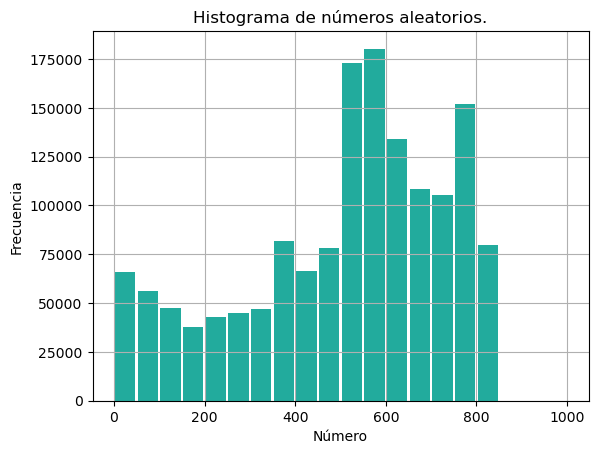

In [60]:
xn = normalizar(y_5)
n = len(xn)
intervalo = int(math.log2(n))
fig, ax = plt.subplots()
plt.hist(xn,intervalo,color='#22AB9D', rwidth=0.90)
plt.title('Histograma de números aleatorios.')
plt.xlabel('Número')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()